<a href="https://colab.research.google.com/github/augsornthip03/MSFT-Stock-prediction-using-LSTM/blob/main/MSFT_Stock_prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd

df = pd.read_csv('/content/MSFT.csv')

In [127]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-24,242.500000,243.949997,240.440002,242.039993,239.912720,40234400
1,2023-01-25,234.479996,243.300003,230.899994,240.610001,238.495270,66526600
2,2023-01-26,243.649994,248.309998,242.000000,248.000000,245.820343,33454500
3,2023-01-27,248.990005,249.830002,246.830002,248.160004,245.978928,26498900
4,2023-01-30,244.509995,245.600006,242.199997,242.710007,240.576828,25867400
...,...,...,...,...,...,...,...
247,2024-01-18,391.720001,393.989990,390.119995,393.869995,393.869995,23392100
248,2024-01-19,395.760010,398.670013,393.500000,398.670013,398.670013,29272000
249,2024-01-22,400.019989,400.619995,393.589996,396.510010,396.510010,27016900
250,2024-01-23,395.750000,399.380005,393.929993,398.899994,398.899994,20525900


In [128]:
df = df[['Date','Close']]
df

,Date,Close
0,2023-01-24,242.039993
1,2023-01-25,240.610001
2,2023-01-26,248.000000
3,2023-01-27,248.160004
4,2023-01-30,242.710007
...,...,...
247,2024-01-18,393.869995
248,2024-01-19,398.670013
249,2024-01-22,396.510010
250,2024-01-23,398.899994


In [129]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year,month,day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [130]:
df['Date'] = df["Date"].apply(str_to_datetime)
df['Date']

<ipython-input-130-8e4f1c65fa94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df["Date"].apply(str_to_datetime)


0     2023-01-24
1     2023-01-25
2     2023-01-26
3     2023-01-27
4     2023-01-30
         ...    
247   2024-01-18
248   2024-01-19
249   2024-01-22
250   2024-01-23
251   2024-01-24
Name: Date, Length: 252, dtype: datetime64[ns]

In [71]:
# df.index = df.pop('Date')
# df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-18,393.869995
2024-01-19,398.670013
2024-01-22,396.510010


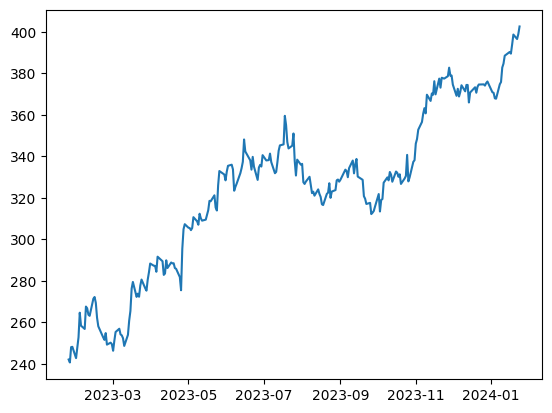

In [131]:
import matplotlib.pyplot as plt
plt.plot(df["Date"], df['Close'])

In [132]:
import numpy as np
def window_data(data, n=3):
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()
windowed_data = window_data(df)

In [133]:
windowed_data

,Target-3,Target-2,Target-1,Target
3,242.039993,240.610001,248.000000,248.160004
4,240.610001,248.000000,248.160004,242.710007
5,248.000000,248.160004,242.710007,247.809998
6,248.160004,242.710007,247.809998,252.750000
7,242.710007,247.809998,252.750000,264.600006
...,...,...,...,...
247,388.470001,390.269989,389.470001,393.869995
248,390.269989,389.470001,393.869995,398.670013
249,389.470001,393.869995,398.670013,396.510010
250,393.869995,398.670013,396.510010,398.899994


In [134]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:,0:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1 ))

  Y = df_as_np[:,-1]

  return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y = windowed_df_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

In [135]:
# Assuming df is your original DataFrame
dmy = df.reset_index(drop=True).iloc[3:, df.columns.get_loc('Date')]


In [137]:
y_test.shape,dmy_test.shape, X_test.shape


((25,), (25,), (25, 3, 1))

In [138]:
y_val.shape,dmy_val.shape, X_val.shape

((25,), (25,), (25, 3, 1))

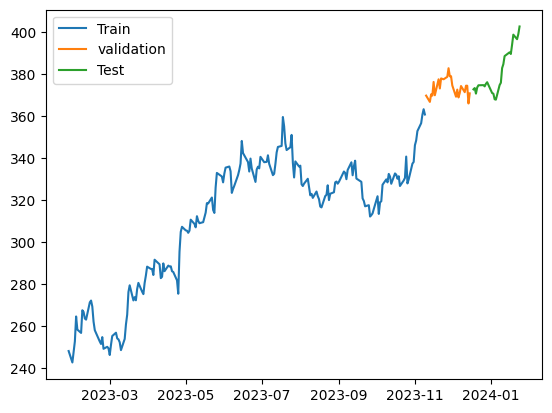

In [136]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dmy_train, dates_train, X_train, y_train = dmy[:q_80],dates[:q_80], X[:q_80], y[:q_80]

dmy_val, dates_val, X_val, y_val = dmy[q_80:q_90],dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dmy_test, dates_test, X_test, y_test = dmy[q_90:],dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dmy_train,y_train)
plt.plot(dmy_val,y_val)
plt.plot(dmy_test,y_test)

plt.legend(['Train','validation','Test'])


In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate = 0.001),
              metrics = ['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs = 500)

Epoch 1/500
7/7 [==============================] - 3s 98ms/step - loss: 97081.0469 - mean_absolute_error: 310.0430 - val_loss: 138847.3594 - val_mean_absolute_error: 372.5983
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 96754.3047 - mean_absolute_error: 309.5171 - val_loss: 138495.2969 - val_mean_absolute_error: 372.1255
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 96461.0234 - mean_absolute_error: 309.0417 - val_loss: 138128.1562 - val_mean_absolute_error: 371.6319
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 96131.9688 - mean_absolute_error: 308.5093 - val_loss: 137656.3750 - val_mean_absolute_error: 370.9967
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 95678.8203 - mean_absolute_error: 307.7746 - val_loss: 136997.4375 - val_mean_absolute_error: 370.1075
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 95029.6719 - mean_absolute_error: 306.7140 - val_loss: 1

1/1 [==============================] - 0s 32ms/step


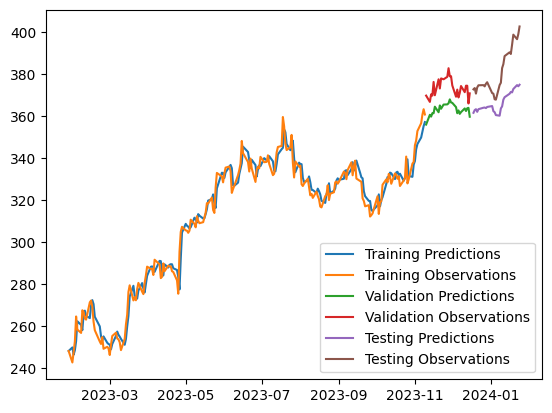

In [145]:
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

plt.plot(dmy_train, train_predictions)
plt.plot(dmy_train, y_train)

plt.plot(dmy_val, val_predictions)
plt.plot(dmy_val, y_val)

plt.plot(dmy_test, test_predictions)
plt.plot(dmy_test, y_test)

plt.legend(['Training Predictions', 'Training Observations','Validation Predictions', 'Validation Observations', 'Testing Predictions', 'Testing Observations'])